# 16.1 Splitting an object into groups

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

D:\Program Files\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [58]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.124461,0.677408
1,bar,one,-0.830092,-0.756952
2,foo,two,1.085252,-0.811569
3,bar,three,-0.865654,-0.788776
4,foo,two,0.486710,-0.106797
5,bar,two,0.099086,-0.978453
6,foo,one,0.391403,-0.301258
7,foo,three,-1.171082,-0.545103


In [5]:
grouped = df.groupby('A')
grouped = df.groupby(['A', 'B'])

In [6]:
 def get_letter_type(letter):
        if letter.lower() in 'aeiou':
            return 'vowel'
        else:
            return 'consonant'
        

In [7]:
 grouped = df.groupby(get_letter_type, axis=1)

显然，get_letter_type函数的返回值就是group name，显然这个函数定义了a mapping of lable to group name

In [8]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [9]:
grouped = s.groupby(level=0)

注意：看完了multiindex，应该需要对level敏感了，显然，当groupby函数的参数level被指定的情况下，也就表明要使用index来进行分组

In [11]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [12]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [13]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

## 16.1.1 GroupBy sorting

In [14]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [15]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [16]:
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


In [18]:
df3 = pd.DataFrame({'X' : ['A', 'B', 'A', 'B'], 'Y' : [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [19]:
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [20]:
df3.groupby(['X']).get_group('B')

,X,Y
1,B,4
3,B,2


## 16.1.2 GroupBy object attributes

In [24]:
df

,A,B,C,D
0,foo,one,2.699105,0.301294
1,bar,one,-1.417945,-2.317604
2,foo,two,-0.227279,1.471652
3,bar,three,0.476644,-1.325698
4,foo,two,0.705054,-1.371071
5,bar,two,-0.476645,1.102865
6,foo,one,0.505329,-1.346775
7,foo,three,0.333910,0.422853


In [23]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [25]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [26]:
grouped = df.groupby(['A', 'B'])
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [27]:
len(grouped)

6

## 16.1.3 GroupBy with MultiIndex

In [30]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
           ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one      -0.737608
       two       1.061706
baz    one      -1.026070
       two       1.164503
foo    one       1.469209
       two       0.288029
qux    one       0.904783
       two       0.050478
dtype: float64

In [33]:
grouped = s.groupby(level=0)
grouped.sum()

first
bar    0.324098
baz    0.138433
foo    1.757238
qux    0.955260
dtype: float64

In [34]:
s.groupby(level='second').sum()

second
one    0.610312
two    2.564717
dtype: float64

In [35]:
s.sum(level='second')

second
one    0.610312
two    2.564717
dtype: float64

## 16.1.4 Grouping DataFrame with Index Levels and Columns

In [37]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
df = pd.DataFrame({'A': [1, 1, 1, 1, 2, 2, 3, 3],'B': np.arange(8)},index=index)
df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [38]:
df.groupby([pd.Grouper(level=1), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [39]:
df.groupby([pd.Grouper(level='second'), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [40]:
df.groupby(['second', 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

## 16.1.5 DataFrame column selection in GroupBy

In [42]:
grouped = df.groupby(['A'])

In [43]:
grouped_C = grouped['C']

KeyError: 'Column not found: C'

In [44]:
grouped_D = grouped['D']

KeyError: 'Column not found: D'

In [45]:
df['C'].groupby(df['A'])

KeyError: 'C'

# 16.2 Iterating through groups

In [46]:
grouped = df.groupby('A')

In [47]:
 for name, group in grouped:
        print(name)
        print(group)

1
              A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
2
              A  B
first second      
foo   one     2  4
      two     2  5
3
              A  B
first second      
qux   one     3  6
      two     3  7


# 16.3 Selecting a group

In [49]:
grouped.get_group(1)

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3

In [52]:

for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)

(1, 0)
              A  B
first second      
bar   one     1  0
(1, 1)
              A  B
first second      
bar   two     1  1
(1, 2)
              A  B
first second      
baz   one     1  2
(1, 3)
              A  B
first second      
baz   two     1  3
(2, 4)
              A  B
first second      
foo   one     2  4
(2, 5)
              A  B
first second      
foo   two     2  5
(3, 6)
              A  B
first second      
qux   one     3  6
(3, 7)
              A  B
first second      
qux   two     3  7


In [53]:
df.groupby(['A', 'B']).get_group((1, 0))

,,A,B
first,second,,
bar,one,1,0


# 16.4 Aggregation

In [59]:
grouped = df.groupby('A')

In [60]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,-1.596660,-2.524181
foo,-0.332177,-1.087319


In [61]:
grouped = df.groupby(['A', 'B'])

In [62]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -0.830092 -0.756952
    three -0.865654 -0.788776
    two    0.099086 -0.978453
foo one   -0.733058  0.376150
    three -1.171082 -0.545103
    two    1.571963 -0.918366

In [64]:
grouped = df.groupby(['A', 'B'], as_index=False)
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-0.830092,-0.756952
1,bar,three,-0.865654,-0.788776
2,bar,two,0.099086,-0.978453
3,foo,one,-0.733058,0.376150
4,foo,three,-1.171082,-0.545103
5,foo,two,1.571963,-0.918366


In [65]:
df.groupby('A', as_index=False).sum()

,A,C,D
0,bar,-1.596660,-2.524181
1,foo,-0.332177,-1.087319


In [66]:
df.groupby(['A', 'B']).sum().reset_index()

,A,B,C,D
0,bar,one,-0.830092,-0.756952
1,bar,three,-0.865654,-0.788776
2,bar,two,0.099086,-0.978453
3,foo,one,-0.733058,0.376150
4,foo,three,-1.171082,-0.545103
5,foo,two,1.571963,-0.918366


In [67]:
grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [68]:
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0 -0.830092       NaN -0.830092 -0.830092 -0.830092 -0.830092 -0.830092   
1   1.0 -0.865654       NaN -0.865654 -0.865654 -0.865654 -0.865654 -0.865654   
2   1.0  0.099086       NaN  0.099086  0.099086  0.099086  0.099086  0.099086   
3   2.0 -0.366529  1.071878 -1.124461 -0.745495 -0.366529  0.012437  0.391403   
4   1.0 -1.171082       NaN -1.171082 -1.171082 -1.171082 -1.171082 -1.171082   
5   2.0  0.785981  0.423233  0.486710  0.636346  0.785981  0.935617  1.085252   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0 -0.756952       NaN -0.756952 -0.756952 -0.756952 -0.756952 -0.756952  
1   1.0 -0.788776       NaN -0.788776 -0.788776 -0.788776 -0.788776 -0.788776  
2   1.0 -0.978453       NaN -0.978453 -0.978453 -0.978453 -0.978453 -0.978453  
3   2.0  0.188075  0.692022 -0.301258 -0.056592  0.188075  0.432742  0.677408  
4   1.0 -0.545103       NaN -0.545103 -0.545103 -0.545103 -0.545103 -0.545103  
5   2.0 -0.459183  0.498349 -0.811569 -0.635376 -0.459183 -0.282990 -0.106797

## 16.4.1 Applying multiple functions at once

In [70]:
grouped = df.groupby('A')
grouped['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,-1.596660,-0.532220,0.547016
foo,-0.332177,-0.066435,1.022452


In [71]:
grouped.agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -1.596660 -0.532220  0.547016 -2.524181 -0.841394  0.119759
foo -0.332177 -0.066435  1.022452 -1.087319 -0.217464  0.565768

In [72]:
(grouped['C'].agg([np.sum, np.mean, np.std]).rename(columns={'sum': 'foo','mean': 'bar','std': 'baz'}))

,foo,bar,baz
A,,,
bar,-1.596660,-0.532220,0.547016
foo,-0.332177,-0.066435,1.022452


In [73]:
(grouped.agg([np.sum, np.mean, np.std]).rename(columns={'sum': 'foo','mean': 'bar','std': 'baz'}))

C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar -1.596660 -0.532220  0.547016 -2.524181 -0.841394  0.119759
foo -0.332177 -0.066435  1.022452 -1.087319 -0.217464  0.565768

## 16.4.2 Applying different functions to DataFrame columns

In [74]:
grouped.agg({'C' : np.sum,'D' : lambda x: np.std(x, ddof=1)})

,D,C
A,,
bar,0.119759,-1.596660
foo,0.565768,-0.332177


In [75]:
grouped.agg({'C' : 'sum', 'D' : 'std'})

,D,C
A,,
bar,0.119759,-1.596660
foo,0.565768,-0.332177


In [76]:
grouped.agg({'D': 'std', 'C': 'mean'})

,D,C
A,,
bar,0.119759,-0.532220
foo,0.565768,-0.066435


In [78]:
grouped.agg(OrderedDict([('D', 'std'), ('C', 'mean')]))

NameError: name 'OrderedDict' is not defined

## 16.4.3 Cython-optimized aggregation functions

In [79]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.596660,-2.524181
foo,-0.332177,-1.087319


In [80]:
df.groupby(['A', 'B']).mean()

C         D
A   B                        
bar one   -0.830092 -0.756952
    three -0.865654 -0.788776
    two    0.099086 -0.978453
foo one   -0.366529  0.188075
    three -1.171082 -0.545103
    two    0.785981 -0.459183

# 16.5 Transformation

In [94]:
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts

1999-10-01    3.895040
1999-10-02   -1.794884
1999-10-03   -0.549336
1999-10-04    1.175662
1999-10-05    7.012307
1999-10-06   -1.570899
1999-10-07    0.449620
1999-10-08    3.875036
1999-10-09    0.126549
1999-10-10    4.224443
1999-10-11   -0.074740
1999-10-12    2.181963
1999-10-13    2.648256
1999-10-14   -0.455911
1999-10-15    2.462448
1999-10-16   -0.285014
1999-10-17   -0.914814
1999-10-18    0.366802
1999-10-19    0.484768
1999-10-20    0.776665
1999-10-21   -5.350077
1999-10-22    0.180112
1999-10-23    0.292692
1999-10-24   -3.719334
1999-10-25   -0.726607
1999-10-26    2.423192
1999-10-27    0.865185
1999-10-28    1.622921
1999-10-29   -2.299035
1999-10-30   -0.606634
                ...   
2002-09-05    0.341872
2002-09-06   -1.607443
2002-09-07    0.455075
2002-09-08    1.602278
2002-09-09   -0.216314
2002-09-10   -0.414417
2002-09-11    0.294726
2002-09-12    0.199825
2002-09-13   -1.309530
2002-09-14    1.831611
2002-09-15    1.508550
2002-09-16   -0.716191
2002-09-17 

In [95]:
ts = ts.rolling(window=100,min_periods=100).mean().dropna()
ts.head()

2000-01-08    0.691459
2000-01-09    0.663604
2000-01-10    0.677626
2000-01-11    0.691533
2000-01-12    0.679053
Freq: D, dtype: float64

In [96]:
ts.tail()

2002-09-30    0.312472
2002-10-01    0.300708
2002-10-02    0.283550
2002-10-03    0.267483
2002-10-04    0.281221
Freq: D, dtype: float64

In [97]:
key = lambda x: x.year
zscore = lambda x: (x - x.mean()) / x.std()

In [98]:
transformed = ts.groupby(key).transform(zscore)
transformed

2000-01-08    1.978952
2000-01-09    1.805767
2000-01-10    1.892947
2000-01-11    1.979412
2000-01-12    1.901820
2000-01-13    1.196683
2000-01-14    1.463856
2000-01-15    1.510692
2000-01-16    1.382519
2000-01-17    1.167964
2000-01-18    1.069720
2000-01-19    0.909008
2000-01-20    0.908138
2000-01-21    0.788057
2000-01-22    0.957387
2000-01-23    0.925121
2000-01-24    0.851451
2000-01-25    0.688959
2000-01-26    0.937283
2000-01-27    0.789538
2000-01-28    0.956699
2000-01-29    1.315865
2000-01-30    1.498927
2000-01-31    1.523367
2000-02-01    1.883411
2000-02-02    2.123618
2000-02-03    1.943752
2000-02-04    1.779760
2000-02-05    1.781678
2000-02-06    2.020606
                ...   
2002-09-05    1.588590
2002-09-06    1.452934
2002-09-07    1.614431
2002-09-08    1.605148
2002-09-09    1.494452
2002-09-10    1.359194
2002-09-11    1.318504
2002-09-12    1.267912
2002-09-13    1.019576
2002-09-14    1.116757
2002-09-15    1.106239
2002-09-16    0.996973
2002-09-17 

In [99]:
grouped = ts.groupby(key)

In [100]:
grouped.mean()

2000    0.373170
2001    0.265318
2002    0.426585
dtype: float64

In [101]:
grouped.std()

2000    0.160837
2001    0.252933
2002    0.190707
dtype: float64

In [102]:
grouped_trans = transformed.groupby(key)

In [103]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

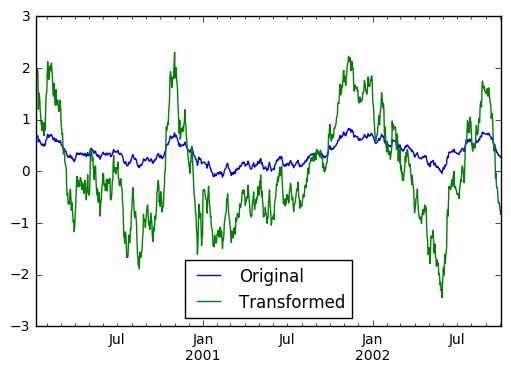

In [107]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare.plot()

In [108]:
data_range = lambda x: x.max() - x.min()

In [109]:
ts.groupby(key).transform(data_range)

2000-01-08    0.673745
2000-01-09    0.673745
2000-01-10    0.673745
2000-01-11    0.673745
2000-01-12    0.673745
2000-01-13    0.673745
2000-01-14    0.673745
2000-01-15    0.673745
2000-01-16    0.673745
2000-01-17    0.673745
2000-01-18    0.673745
2000-01-19    0.673745
2000-01-20    0.673745
2000-01-21    0.673745
2000-01-22    0.673745
2000-01-23    0.673745
2000-01-24    0.673745
2000-01-25    0.673745
2000-01-26    0.673745
2000-01-27    0.673745
2000-01-28    0.673745
2000-01-29    0.673745
2000-01-30    0.673745
2000-01-31    0.673745
2000-02-01    0.673745
2000-02-02    0.673745
2000-02-03    0.673745
2000-02-04    0.673745
2000-02-05    0.673745
2000-02-06    0.673745
                ...   
2002-09-05    0.799322
2002-09-06    0.799322
2002-09-07    0.799322
2002-09-08    0.799322
2002-09-09    0.799322
2002-09-10    0.799322
2002-09-11    0.799322
2002-09-12    0.799322
2002-09-13    0.799322
2002-09-14    0.799322
2002-09-15    0.799322
2002-09-16    0.799322
2002-09-17 

In [110]:
ts.groupby(key).transform('max') - ts.groupby(key).transform('min')

2000-01-08    0.673745
2000-01-09    0.673745
2000-01-10    0.673745
2000-01-11    0.673745
2000-01-12    0.673745
2000-01-13    0.673745
2000-01-14    0.673745
2000-01-15    0.673745
2000-01-16    0.673745
2000-01-17    0.673745
2000-01-18    0.673745
2000-01-19    0.673745
2000-01-20    0.673745
2000-01-21    0.673745
2000-01-22    0.673745
2000-01-23    0.673745
2000-01-24    0.673745
2000-01-25    0.673745
2000-01-26    0.673745
2000-01-27    0.673745
2000-01-28    0.673745
2000-01-29    0.673745
2000-01-30    0.673745
2000-01-31    0.673745
2000-02-01    0.673745
2000-02-02    0.673745
2000-02-03    0.673745
2000-02-04    0.673745
2000-02-05    0.673745
2000-02-06    0.673745
                ...   
2002-09-05    0.799322
2002-09-06    0.799322
2002-09-07    0.799322
2002-09-08    0.799322
2002-09-09    0.799322
2002-09-10    0.799322
2002-09-11    0.799322
2002-09-12    0.799322
2002-09-13    0.799322
2002-09-14    0.799322
2002-09-15    0.799322
2002-09-16    0.799322
2002-09-17 

Another common data transform is to replace missing data with the group mean.

In [126]:
data_df=pd.DataFrame(np.random.randn(3000).reshape(1000,3),columns=['A','B','C'])
data_df

,A,B,C
0,0.828127,-0.110294,0.035183
1,1.027962,-0.060075,-0.458134
2,-0.004339,0.005199,-0.842601
3,-0.081081,-0.607193,-1.168593
4,1.058312,-1.303463,-1.633475
5,0.247164,0.706189,-0.499013
6,0.835416,-1.240551,-0.705808
7,0.922992,-1.361350,-2.774647
8,0.442373,-1.421477,-1.532760
9,-1.218626,-1.069070,-0.111141


In [130]:
countries = np.array(['US', 'UK', 'GR', 'JP'])
np.random.randint(0, 4, 1000)

array([2, 2, 0, 1, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2,
       1, 2, 0, 1, 3, 0, 0, 1, 3, 0, 0, 0, 2, 3, 0, 2, 0, 3, 0, 1, 1, 0,
       0, 0, 3, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 3, 0, 1, 3, 2, 2, 2, 3, 0,
       2, 3, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 3, 1,
       1, 2, 1, 2, 3, 3, 1, 2, 3, 0, 3, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       1, 3, 2, 0, 3, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 1, 3, 0, 0, 1, 1, 1, 3, 0, 2, 0, 3, 0, 3, 1, 2, 3, 1, 0,
       1, 3, 0, 1, 2, 1, 0, 1, 0, 2, 3, 0, 3, 1, 1, 2, 2, 1, 3, 2, 1, 1,
       3, 2, 0, 1, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 1, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3,
       3, 0, 2, 3, 2, 1, 2, 2, 3, 0, 0, 0, 1, 3, 3, 2, 1, 0, 3, 1, 1, 3,
       3, 0, 3, 3, 0, 2, 3, 0, 0, 0, 3, 3, 3, 3, 0, 1, 1, 0, 3, 0, 3, 3,
       2, 2, 1, 0, 1, 2, 3, 2, 1, 0, 0, 3, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3,
       0, 3, 2, 2, 2, 2, 3, 2, 0, 0, 2, 1, 2, 2, 1,

In [141]:
key = countries[np.random.randint(0, 4, 1000)]
key

array(['US', 'GR', 'JP', 'US', 'GR', 'UK', 'US', 'GR', 'UK', 'GR', 'UK',
       'GR', 'GR', 'UK', 'UK', 'US', 'US', 'JP', 'US', 'JP', 'GR', 'GR',
       'US', 'JP', 'US', 'UK', 'JP', 'JP', 'JP', 'US', 'GR', 'UK', 'JP',
       'UK', 'UK', 'US', 'GR', 'JP', 'JP', 'US', 'JP', 'UK', 'UK', 'JP',
       'JP', 'JP', 'US', 'GR', 'US', 'US', 'US', 'JP', 'GR', 'JP', 'US',
       'UK', 'US', 'JP', 'JP', 'GR', 'UK', 'GR', 'GR', 'JP', 'GR', 'GR',
       'GR', 'GR', 'GR', 'UK', 'JP', 'US', 'UK', 'UK', 'US', 'JP', 'JP',
       'UK', 'US', 'US', 'US', 'US', 'US', 'UK', 'GR', 'UK', 'JP', 'US',
       'GR', 'UK', 'GR', 'US', 'JP', 'JP', 'US', 'JP', 'US', 'US', 'GR',
       'JP', 'GR', 'UK', 'US', 'JP', 'UK', 'JP', 'JP', 'GR', 'US', 'US',
       'JP', 'GR', 'UK', 'JP', 'UK', 'GR', 'UK', 'GR', 'JP', 'GR', 'GR',
       'JP', 'US', 'JP', 'US', 'UK', 'GR', 'JP', 'UK', 'JP', 'GR', 'UK',
       'JP', 'JP', 'US', 'GR', 'US', 'US', 'JP', 'GR', 'GR', 'JP', 'US',
       'US', 'US', 'US', 'US', 'JP', 'GR', 'UK', 'U

In [140]:
grouped = data_df.groupby(key)
grouped.groups

{'GR': Int64Index([  5,  18,  26,  32,  33,  38,  45,  51,  56,  60,
             ...
             945, 949, 950, 961, 964, 973, 974, 979, 985, 994],
            dtype='int64', length=235),
 'JP': Int64Index([  1,   3,   6,  10,  11,  13,  20,  23,  27,  36,
             ...
             958, 975, 978, 980, 983, 986, 987, 988, 990, 998],
            dtype='int64', length=251),
 'UK': Int64Index([  4,   7,   8,   9,  14,  16,  17,  19,  21,  30,
             ...
             952, 960, 962, 963, 968, 972, 981, 982, 984, 993],
            dtype='int64', length=250),
 'US': Int64Index([  0,   2,  12,  15,  22,  24,  25,  28,  29,  35,
             ...
             971, 976, 977, 989, 991, 992, 995, 996, 997, 999],
            dtype='int64', length=264)}

表示将data_df随机分成四类，这四类为countries

In [121]:
grouped.count()

,A,B,C
GR,271,271,271
JP,256,256,256
UK,239,239,239
US,234,234,234


In [122]:
f = lambda x: x.fillna(x.mean())

In [144]:
transformed = grouped.transform(f)
transformed

,A,B,C
0,0.828127,-0.110294,0.035183
1,1.027962,-0.060075,-0.458134
2,-0.004339,0.005199,-0.842601
3,-0.081081,-0.607193,-1.168593
4,1.058312,-1.303463,-1.633475
5,0.247164,0.706189,-0.499013
6,0.835416,-1.240551,-0.705808
7,0.922992,-1.361350,-2.774647
8,0.442373,-1.421477,-1.532760
9,-1.218626,-1.069070,-0.111141


显然，对grouped执行transform后返回的结果和原dataframe是同构的

In [145]:
grouped_trans = transformed.groupby(key)

In [146]:
grouped.mean()

,A,B,C
GR,-0.108906,0.024802,0.078695
JP,-0.051437,-0.070116,-0.013017
UK,-0.040967,0.042542,-0.029417
US,-0.045908,0.014057,-0.026218


In [147]:
grouped_trans.mean()

,A,B,C
GR,-0.083690,-0.037037,0.044591
JP,0.019203,0.054376,0.009359
UK,-0.052340,-0.055207,-0.075634
US,-0.122903,0.053557,0.015501


In [148]:
grouped.count()

,A,B,C
GR,235,235,235
JP,251,251,251
UK,250,250,250
US,264,264,264


In [149]:
grouped_trans.count()

,A,B,C
GR,284,284,284
JP,242,242,242
UK,234,234,234
US,240,240,240


In [150]:
grouped_trans.size()

GR    284
JP    242
UK    234
US    240
dtype: int64

In [151]:
grouped.ffill()

,None,A,B,C
0,US,0.828127,-0.110294,0.035183
1,JP,1.027962,-0.060075,-0.458134
2,US,-0.004339,0.005199,-0.842601
3,JP,-0.081081,-0.607193,-1.168593
4,UK,1.058312,-1.303463,-1.633475
5,GR,0.247164,0.706189,-0.499013
6,JP,0.835416,-1.240551,-0.705808
7,UK,0.922992,-1.361350,-2.774647
8,UK,0.442373,-1.421477,-1.532760
9,UK,-1.218626,-1.069070,-0.111141


## 16.5.1 New syntax to window and resample operations

In [17]:
df_re = pd.DataFrame({'A': [1]*10 + [5]*10,'B': np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [18]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [22]:
result=df_re.groupby('A').rolling(2).B.sum()

result.index

MultiIndex(levels=[[1, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],
           names=['A', None])

In [155]:
df_re.groupby('A').expanding().sum()

A      B
A                
1 0    1.0    0.0
  1    2.0    1.0
  2    3.0    3.0
  3    4.0    6.0
  4    5.0   10.0
  5    6.0   15.0
  6    7.0   21.0
  7    8.0   28.0
  8    9.0   36.0
  9   10.0   45.0
5 10   5.0   10.0
  11  10.0   21.0
  12  15.0   33.0
  13  20.0   46.0
  14  25.0   60.0
  15  30.0   75.0
  16  35.0   91.0
  17  40.0  108.0
  18  45.0  126.0
  19  50.0  145.0

In [3]:
df_re = pd.DataFrame({'date': pd.date_range(start='2016-01-01',periods=4,freq='W'),
                      'group': [1, 1, 2, 2],
                      'val': [5, 6, 7, 8]}).set_index('date')
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [4]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8

# 16.6 Filtration

In [6]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf_grouped=sf.groupby(sf)
sf_grouped.groups

{1: Int64Index([0, 1], dtype='int64'),
 2: Int64Index([2], dtype='int64'),
 3: Int64Index([3, 4, 5], dtype='int64')}

In [7]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [12]:
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})
dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [13]:
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [10]:
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [15]:
dff['C'] = np.arange(8)
dff.groupby('B').filter(lambda x: len(x['C']) > 2)

,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


# 16.8 Flexible apply

In [3]:
df = pd.DataFrame({'A':['foo', 'bar','foo', 'bar','foo', 'bar','foo', 'foo'], 
                   'C': np.arange(8),
                   'D': np.arange(8), 
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three']})

In [5]:
grouped = df.groupby('A')

In [6]:
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean     3.000000
     std      2.000000
     min      1.000000
     25%      2.000000
     50%      3.000000
     75%      4.000000
     max      5.000000
foo  count    5.000000
     mean     3.800000
     std      2.863564
     min      0.000000
     25%      2.000000
     50%      4.000000
     75%      6.000000
     max      7.000000
Name: C, dtype: float64

In [7]:
grouped = df.groupby('A')['C']

In [9]:
def f(group):
    return pd.DataFrame({'original' : group,
                         'demeaned' : group - group.mean()})
grouped.apply(f)

,demeaned,original
0,-3.8,0
1,-2.0,1
2,-1.8,2
3,0.0,3
4,0.2,4
5,2.0,5
6,2.2,6
7,3.2,7
